<a href="https://colab.research.google.com/github/dzailz/MFoML/blob/main/Katin_V_V_MFoML_practice_3_synth_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons, make_circles

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

# Вспомогательные функции

In [39]:
from random import choice
def random_color() -> str:
    return "#" + "".join([choice('0123456789ABCDEF') for j in range(6)])

In [40]:
def plot_data(ax, ds, name='', marker='o', colours=("#FF0000", '#0000FF'), alpha=0.7, s=150, facecolor=True):
    """
    Визуализация двумерных  данных для классификации   
    Входные переменные:

    :ax: 
    :ds: набор данных, содержащий признаки X и целевые метки y
    :name: название графика
    :marker: тип маркера - по умолчанию просто круги
    :colors: цвета, которые будут использоваться для раскраски разных классов - по умолчанию Красный и Синий
    :alpha: прозрачность маркеров
    :s: размер маркера (~ квадрат радиуса)
    """
    X, y = ds

    cm_bright = ListedColormap(colours)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [41]:
def metrics_log(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred).round(2)
    recall = recall_score(y_test, y_pred).round(2)
    precision = precision_score(y_test, y_pred).round(2)
    f1 = f1_score(y_test, y_pred).round(2)

    all_models = pd.DataFrame({
    "Индекс" : ["Доля правильных ответов", "Полнота", "Точность", "f1"],
    "Значение" : [accuracy, recall, precision, f1]
    })
    return all_models

In [42]:
def conf_matrix(y_test, y_predict):
    """Функция матрицы несоответствий"""
    c_matrix = confusion_matrix(y_test, y_predict)
    TN = c_matrix[0, 0]
    TP = c_matrix[1, 1]
    FN = c_matrix[1, 0]
    FP = c_matrix[0, 1]

    print(f"""Истинно-отрицательные результаты:   {TN}
Истинно-положительные результаты:  {TP}
Ложно-положительные результаты: {FP}
Ложно-отрицательные результаты: {FN}

Доля правильных ответов алгоритма:  {round((TP + TN) / float(TP + TN +FP + FN), 3)}
Точность: {round(TP / float(TP + FP), 3)}
Полнота:    {round(TP / float(TP + FN), 3)}
Специфичность: {round(TN / float(TN + FP), 3)}
Отрицательные:  {round(TN / float(TN + FN), 3)}""")

In [43]:
def roc_auc(y_test, y_predict, dens=True):
    probs = y_predict

    false, true, threshold = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)

    plt.figure()
    fig, ax = plt.subplots(figsize=(7,7))
    plt.plot([0, 1], label="Random guess", linestyle="--", color=random_color())
    plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=":", color=random_color(), label = "Идеальный результат")
    plt.plot(false, true, label="ROC-AUC", color=random_color())
    ax.set_title('ROC-кривая = %0.3f'%roc_auc)
    plt.ylabel('Положительный Rate')
    plt.xlabel('Ложно-положительный Rate')
    plt.legend(loc='lower right')
    plt.show()

In [44]:
def to_polynom(X, order=2):
    order_range = range(order, order + 1,1)
    out = np.copy(X) 
    for i in order_range:
        out = np.hstack([out, np.power(X, i)])
    return out

# Генерация данных, распределенные как знак Инь-Ян

In [45]:
X, y = make_moons(n_samples=400, noise=0.3, random_state=22)

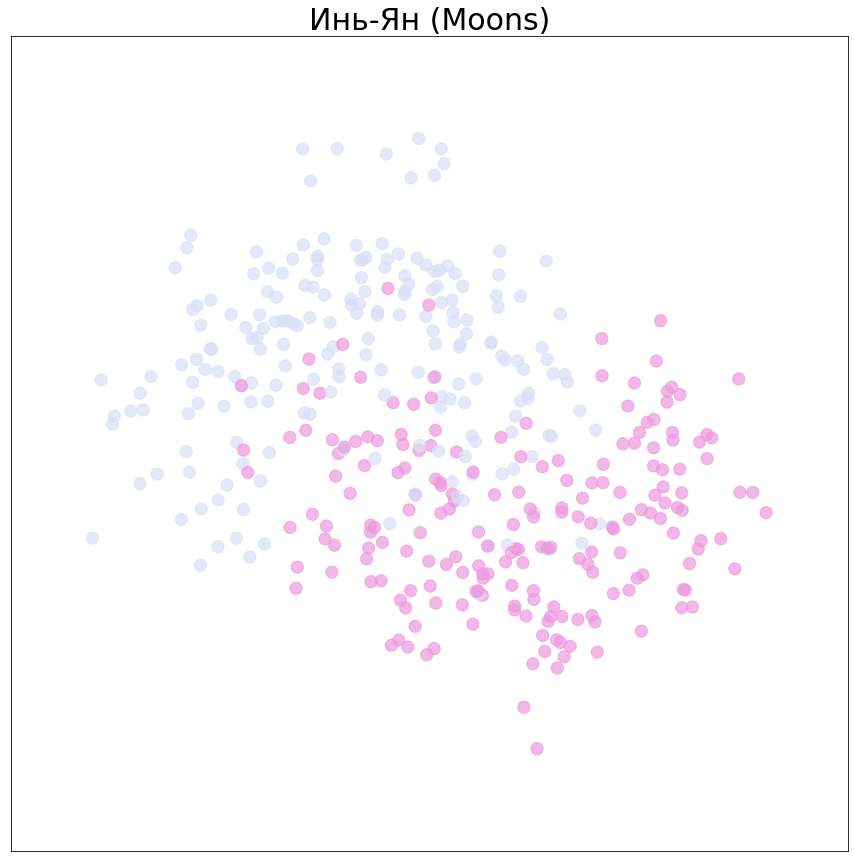

In [46]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(1, 1, 1)
plot_data(ax, (X, y), "Инь-Ян (Moons)", colours=(random_color(), random_color()))

## Степень полиномов - 2

In [47]:
Xp = to_polynom(X, order=2)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=22)

In [48]:
LogR = LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)
LogR.fit(X_train, y_train)
y_predict = LogR.predict(X_test)

In [49]:
metrics_log(y_test, y_predict)

print('Тестовые результаты: {:.4f}'.format(LogR.score(X_test, y_test)))
print('Тренировочные результаты: {:.4f}'.format(LogR.score(X_train, y_train)))

Тестовые результаты: 0.8750
Тренировочные результаты: 0.8393


In [50]:
print (classification_report(y_test, y_predict, target_names=['Part 1','Part 2']))

              precision    recall  f1-score   support

      Part 1       0.86      0.88      0.87        57
      Part 2       0.89      0.87      0.88        63

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [51]:
conf_matrix(y_test, y_predict)

Истинно-отрицательные результаты:   50
Истинно-положительные результаты:  55
Ложно-положительные результаты: 7
Ложно-отрицательные результаты: 8

Доля правильных ответов алгоритма:  0.875
Точность: 0.887
Полнота:    0.873
Специфичность: 0.877
Отрицательные:  0.862


Для довольно большого уровня шума получились очень неплохие данные.

Параметр полинома 2 

Все параметры в районе 0.9

<Figure size 432x288 with 0 Axes>

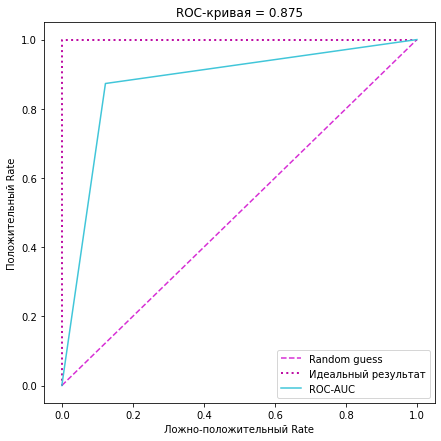

In [52]:
roc_auc(y_test, y_predict);

График ROC показал площадь 0.875, что довольно хорошо

## Степень полиномов - 4

In [53]:
Xp = to_polynom(X, order=4)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=22)

In [54]:
LogR = LogisticRegression(fit_intercept=True, penalty='l2', solver='saga', C=1, max_iter=100000)
LogR.fit(X_train, y_train)
y_predict = LogR.predict(X_test)

In [55]:
metrics_log(y_test, y_predict)

print('Test score: {:.4f}'.format(LogR.score(X_test, y_test)))
print('Train score: {:.4f}'.format(LogR.score(X_train, y_train)))

Test score: 0.8833
Train score: 0.8286


In [56]:
print (classification_report(y_test, y_predict, target_names=["Part 1", "Part 2"]))

              precision    recall  f1-score   support

      Part 1       0.86      0.89      0.88        57
      Part 2       0.90      0.87      0.89        63

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



In [57]:
conf_matrix(y_test, y_predict)

Истинно-отрицательные результаты:   51
Истинно-положительные результаты:  55
Ложно-положительные результаты: 6
Ложно-отрицательные результаты: 8

Доля правильных ответов алгоритма:  0.883
Точность: 0.902
Полнота:    0.873
Специфичность: 0.895
Отрицательные:  0.864


Результаты выше показывают, что параметром полинома 4 модель еще немного улучшилась


<Figure size 432x288 with 0 Axes>

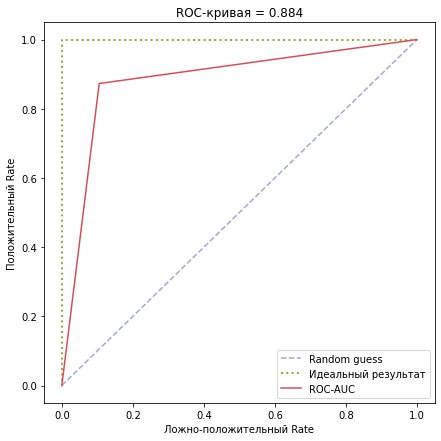

In [58]:
roc_auc(y_test, y_predict);

График показал площадь выросшую на 0.1

# Генерация данных, распределенные как Круги

In [59]:
X, y = make_circles(n_samples=400, noise=0.3, factor=0.5, random_state=22)

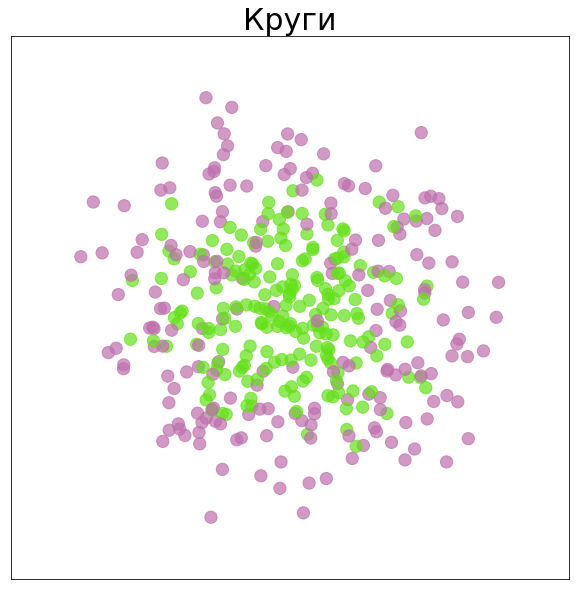

In [60]:
fig = plt.figure(figsize= (10,10))
ax = plt.subplot(1, 1, 1)
plot_data(ax, (X, y), 'Круги', colours=(random_color(), random_color()))

## Степень полиномов - 2

In [61]:
# Выберем степень полиномов - 2
Xp = to_polynom(X, order = 2)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=22)

In [62]:
LogR = LogisticRegression(fit_intercept=True, penalty='l1', solver='saga', C=1, max_iter=100000)
LogR.fit(X_train, y_train)
y_predict = LogR.predict(X_test)

In [63]:
metrics_log(y_test, y_predict)

print('Test score: {:.4f}'.format(LogR.score(X_test, y_test)))
print('Train score: {:.4f}'.format(LogR.score(X_train, y_train)))

Test score: 0.8167
Train score: 0.7679


Оценки обучающего и тестового наборов дают неплохие результаты на 2 полиномах.



In [64]:
print (classification_report(y_test, y_predict, target_names=['Part 1','Part 2']))

              precision    recall  f1-score   support

      Part 1       0.84      0.75      0.80        57
      Part 2       0.80      0.87      0.83        63

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120



In [65]:
conf_matrix(y_test, y_predict)

Истинно-отрицательные результаты:   43
Истинно-положительные результаты:  55
Ложно-положительные результаты: 14
Ложно-отрицательные результаты: 8

Доля правильных ответов алгоритма:  0.817
Точность: 0.797
Полнота:    0.873
Специфичность: 0.754
Отрицательные:  0.843


При степени шума в 30% модель довольно неплохо справляется с задачей

<Figure size 432x288 with 0 Axes>

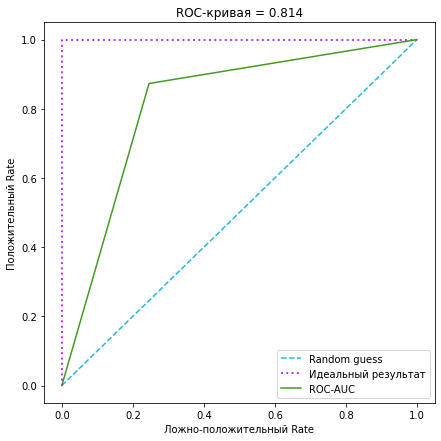

In [66]:
roc_auc(y_test, y_predict);

График кривой ROC показал площадь - 0,814. Результат не плохой, но попробуем улучшить его

## Степень полиномов - 4

Выберем степень полиномов - 4, в предыдущий раз данный показатель давал немного улучшенные результаты

In [67]:
Xp = to_polynom(X, order=4)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.3, random_state=22)

In [68]:
LogR = LogisticRegression(fit_intercept=True, penalty='l1', solver='saga', C=1, max_iter=100000)
LogR.fit(X_train, y_train)
y_predict = LogR.predict(X_test)

In [69]:
metrics_log(y_test, y_predict)

print('Test score: {:.4f}'.format(LogR.score(X_test, y_test)))
print('Train score: {:.4f}'.format(LogR.score(X_train, y_train)))

Test score: 0.7833
Train score: 0.7571


Оценки уступают тем, что получены на 2 полиномах.


In [70]:
print (classification_report(y_test, y_predict, target_names=['Part 1','Part 2']))

              precision    recall  f1-score   support

      Part 1       0.84      0.67      0.75        57
      Part 2       0.75      0.89      0.81        63

    accuracy                           0.78       120
   macro avg       0.80      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120



In [71]:
conf_matrix(y_test, y_predict)

Истинно-отрицательные результаты:   38
Истинно-положительные результаты:  56
Ложно-положительные результаты: 19
Ложно-отрицательные результаты: 7

Доля правильных ответов алгоритма:  0.783
Точность: 0.747
Полнота:    0.889
Специфичность: 0.667
Отрицательные:  0.844


Все показатели занижены относительно предыдущего теста.

<Figure size 432x288 with 0 Axes>

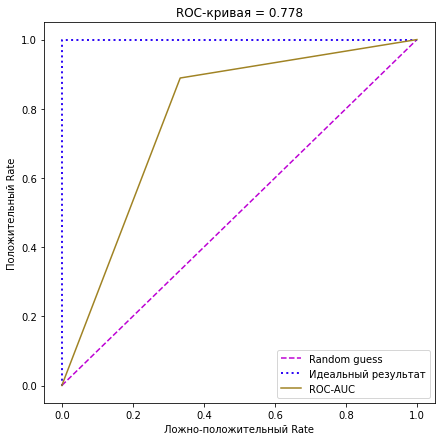

In [72]:
roc_auc(y_test, y_predict);

График кривой ROC показал площадь - 0,778, что хуже, чем в случае с 2 полиномами. Вероятно всего, формула не требует увеличения полиномов и это ухудшает ситуацию.